
# Project: Online Retail Dataset RFM Segmentation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#ml">Clustering</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Abstract: This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

>Source:
https://archive.ics.uci.edu/ml/datasets/online+retail#

>Task :
 - RFM Analysis
 - Clustering Experiments on Big Transaction Data for Market Segmentation
>
- RFM (Recency, Frequency, Monetary) analysis is a behavior-based approach grouping customers into segments, RFM filters customers into various groups for the purpose of better service
- Recency (R): Number of days since last purchase (least recency)
- Frequency (F): total number of purchases per customer. ( high frequency)
- Monetary Value(M): It means the total money customer spent (high monetary value)

In [22]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("whitegrid")
%matplotlib inline
import datetime as dt

In [2]:
#Setting style and figure size for Seaborn library
sb.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 6]})

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading excel file of raw data
path = r"D:\Downloads\Data Sources\Online Retail.csv"
df  = pd.read_csv(path)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


**Attribute Information**


| Column name   | Desc         |
|:------------- |:-------------| 
| InvoiceNo  | Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.    | 
|StockCode |Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.|
|Description|Product (item) name. Nominal.|
|Quantity|The quantities of each product (item) per transaction. Numeric.|
| InvoiceDate|Invoice Date and time. Numeric, the day and time when each transaction was generated. |
| UnitPrice| Unit price. Numeric, Product price per unit in sterling.|
|CustomerID |Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. |
|Country |Country name. Nominal, the name of the country where each customer resides. |



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
#Data frame size (Rows and Columns)
df.shape

(541909, 8)

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [6]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [69]:
#figuring the % of Null values
na_ratio = df.isna().sum().sort_values(ascending = False)/len(df)
na_ratio

CustomerID     0.249267
Description    0.002683
InvoiceNo      0.000000
StockCode      0.000000
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
Country        0.000000
dtype: float64

> Customer ID is missing about 25% of its values

In [9]:
df.duplicated().sum()

5268

In [5]:
df.loc[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


> Duplicate Values are not really Duplicated because it contains different StockCode values 

In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [83]:
df.describe(include = 'object')

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


### The structure of your dataset

> The dataset contains 541909 observations/rows, 8 features/columns

### The main feature(s) of interest in your dataset?

> The Features that are essential for RFM (Recency, Frequency, and Monetary) customer segmentation, Date, 
Unique Customer ID, and how much from the invoice no (Total Purchases).




### Data Cleaning & preprocessing

- Quantity column contains negative numbers, also max and min numbers are the same
- Unit price also has negative values( will add a new column for the product of quantity and unit price for EDA)
- Invoice Date to be Parsed
- Invoice Number o Integer 

In [6]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

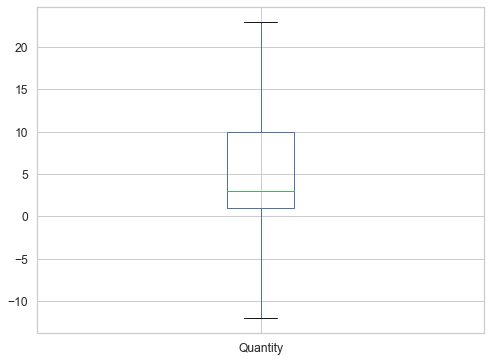

In [71]:
df['Quantity'].plot.box(showfliers = False);

In [8]:
#Assigning the data set to values greater than zero in the Quantity column 
df = df.loc[df['Quantity'] > 0]

In [9]:
#creating a total sum column for the product of unit price and quantity 
df['Total_sum'] = df['Quantity'] * df['UnitPrice']
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_sum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.3


In [10]:
#parsing the date column
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [11]:
#Test
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531285 non-null  object        
 1   StockCode    531285 non-null  object        
 2   Description  530693 non-null  object        
 3   Quantity     531285 non-null  int64         
 4   InvoiceDate  531285 non-null  datetime64[ns]
 5   UnitPrice    531285 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      531285 non-null  object        
 8   Total_sum    531285 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 40.5+ MB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 
- which month has a Sales surge? (Trends in Sales)
- which country has the highest sales?
- Most Frequent unique Customers' id?
- Customer Ids with the highest purchases?

## Univariate Exploration


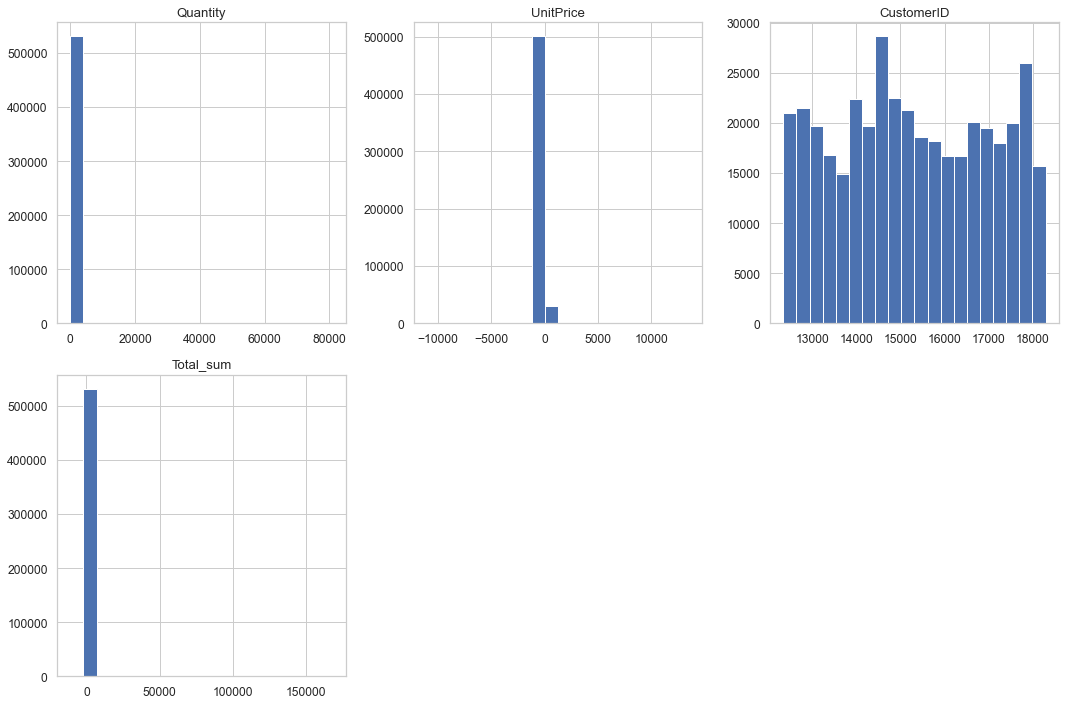

In [75]:
#plotting the ditributions of the numerical variables
df.select_dtypes('number').hist(bins = 20, layout=(2,3), figsize=(15, 10))
plt.tight_layout();

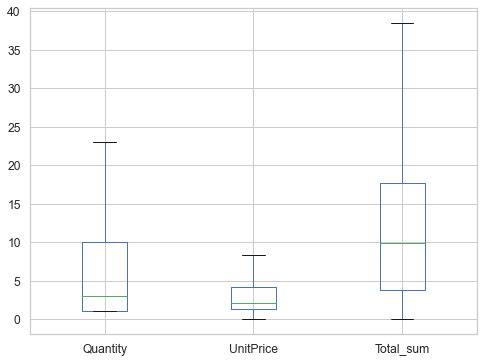

In [76]:
#Closer Look at the distributions of price , Quantity, and Total rev
df[['Quantity', 'UnitPrice', 'Total_sum']].plot.box(showfliers = False);

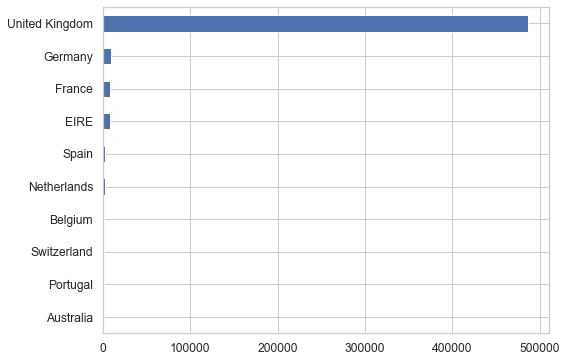

In [77]:
#plotting most order by countries 
df['Country'].value_counts(ascending=False)[:10].plot(kind = 'barh')
plt.gca().invert_yaxis();

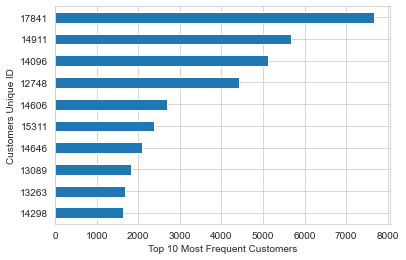

In [21]:
#10 Most Frequent Customers
df.CustomerID.value_counts(ascending=False)[:10].plot(kind = 'barh')
plt.gca().invert_yaxis()
plt.xlabel('Top 10 Most Frequent Customers')
plt.ylabel('Customers Unique ID');

## Bivariate Exploration & Multivariate Exploration


In [89]:
#Looking at Number of orders by Month
df_monthly_orders = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()
df_monthly_orders.to_frame()

,InvoiceNo
InvoiceDate,
2010-12-31,1629
2011-01-31,1120
2011-02-28,1126
2011-03-31,1531
2011-04-30,1318
2011-05-31,1731
2011-06-30,1576
2011-07-31,1540
2011-08-31,1409


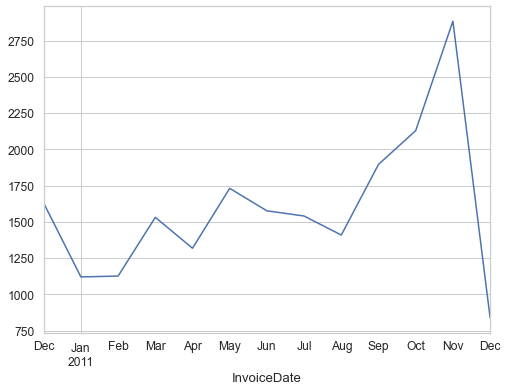

In [90]:
df_monthly_orders.plot();
#plt.xticks(range(len(df_monthly_orders)), 
           #[x.strftime('%m.%y') for x in df_monthly_orders.index],
         # rotation = 45);

> Data for December was not provided Hence the Drop in Dec in the Chart above

In [91]:
Invoive_dec = df.loc[df['InvoiceDate'] >= '2011-12-01', 'InvoiceDate']
print(Invoive_dec.min())
print(Invoive_dec.max())

2011-12-01 08:33:00
2011-12-09 12:50:00


In [92]:
#disregarding Dec data 
df_monthly_orders = df_monthly_orders.loc[df_monthly_orders.index < '2011-12-01']

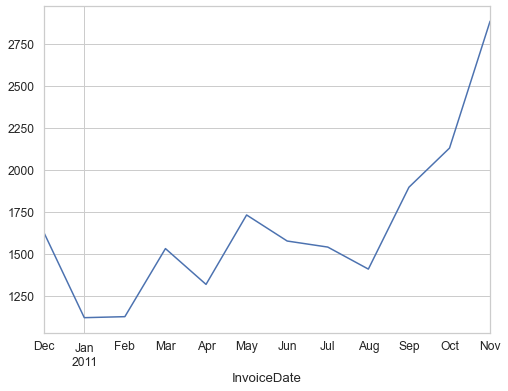

In [93]:
df_monthly_orders.plot();

> There's a trend in Sales from Sep 2011 till Nov 2011

In [12]:
#creating a monthly dateframe for rev(Total sales) by Month
df_monthly_Rev = df.set_index('InvoiceDate')['Total_sum'].resample('M').sum()
df_monthly_Rev.to_frame()

,Total_sum
InvoiceDate,
2010-12-31,823746.140
2011-01-31,691364.560
2011-02-28,523631.890
2011-03-31,717639.360
2011-04-30,537808.621
2011-05-31,770536.020
2011-06-30,761739.900
2011-07-31,719221.191
2011-08-31,737014.260


In [13]:
df_monthly_Rev.describe()

count    1.300000e+01
mean     8.188123e+05
std      2.730611e+05
min      5.236319e+05
25%      6.913646e+05
50%      7.370143e+05
75%      8.237461e+05
max      1.509496e+06
Name: Total_sum, dtype: float64

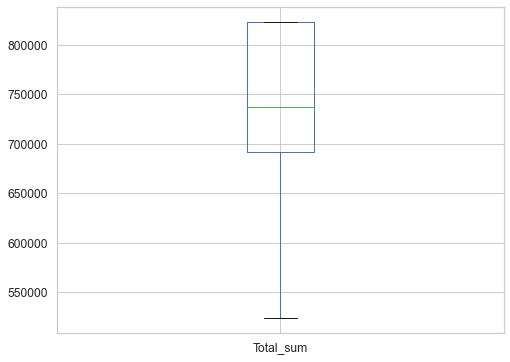

In [15]:
df_monthly_Rev.plot(kind = 'box', showfliers = False);

> Avg Revenue is around 800K 

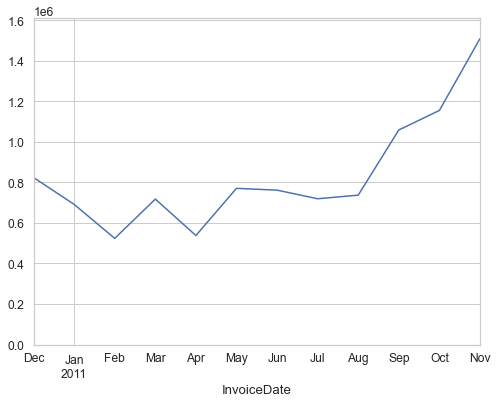

In [97]:
ax = df_monthly_Rev[:-1].plot();

In [128]:
#creating a dataframe of unique customers who purched multiple times in a month
repeat_customer = df.groupby(['InvoiceNo','InvoiceDate']).agg({'Total_sum': sum,
                                                              'CustomerID':max,
                                                              'Country': max}).reset_index()
repeat_customer

,InvoiceNo,InvoiceDate,Total_sum,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850.0,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850.0,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047.0,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047.0,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047.0,United Kingdom
...,...,...,...,...,...
20765,581586,2011-12-09 12:49:00,339.20,13113.0,United Kingdom
20766,581587,2011-12-09 12:50:00,249.45,12680.0,France
20767,A563185,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
20768,A563186,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom


In [131]:
#Grouping the repeated customer dataframe by month
repeat_customer_df = repeat_customer.set_index('InvoiceDate').groupby(
    [pd.Grouper (freq = 'M'), 'CustomerID'] 
).filter(lambda x: len(x) >1).resample('M').nunique()['CustomerID']

> Interpretation, The DF repeat_Customer contains only customers with more than one purchase Each Month 

In [133]:
#Checking 
repeat_customer_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
2011-12-31    106
Freq: M, Name: CustomerID, dtype: int64

In [114]:
#Comparing to total Unique Customers per Month
all_customers_month = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()
all_customers_month

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
2011-12-31     615
Freq: M, Name: CustomerID, dtype: int64

In [134]:
#monthly_repeat_percentage 
monthly_repeat_percentage = repeat_customer_df/all_customers_month*100.0
monthly_repeat_percentage


InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
2011-12-31    17.235772
Freq: M, Name: CustomerID, dtype: float64

In [121]:
print(monthly_repeat_percentage.mean())

23.08651090558984


> On average 23 % of the customers are repeated customers 

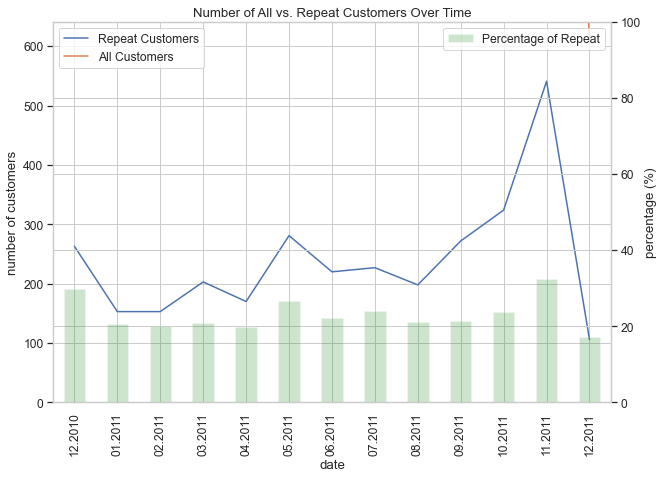

In [136]:
#plotting the repeated customers (bar chart) with their % and all unique customers by month 
ax = pd.DataFrame(repeat_customer_df.values).plot(
    figsize=(10,7))

pd.DataFrame(all_customers_month.values).plot(
    ax=ax,
    grid=True)

ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(
    ax=ax,
    grid=True,
    secondary_y=True,
    color='green',
    alpha=0.2)

ax.set_xlabel('date')
ax.set_ylabel('number of customers')
ax.set_title('Number of All vs. Repeat Customers Over Time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax.set_ylim([0, repeat_customer_df.values.max()+100])
ax2.set_ylim([0, 100])

plt.xticks(
    range(len(repeat_customer_df.index)), 
    [x.strftime('%m.%Y') for x in repeat_customer_df.index], 
    rotation=45)

plt.show()

In [138]:
#how much of the monthly revenue comes from Repeated Customers
repeat_customers_rev = repeat_customer.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').sum()['Total_sum']

In [139]:
repeat_customers_rev

InvoiceDate
2010-12-31    359170.60
2011-01-31    222124.00
2011-02-28    191229.37
2011-03-31    267390.48
2011-04-30    195474.18
2011-05-31    378197.04
2011-06-30    376307.26
2011-07-31    317475.00
2011-08-31    317134.25
2011-09-30    500663.36
2011-10-31    574006.87
2011-11-30    713775.85
2011-12-31    146833.97
Freq: M, Name: Total_sum, dtype: float64

In [141]:
# % of Repeated cutomers revenue by month and overall revenue by month
monthly_rev_perc_repeat_customers_df = repeat_customers_rev/df_monthly_Rev*100
monthly_rev_perc_repeat_customers_df

InvoiceDate
2010-12-31    43.602098
2011-01-31    32.128346
2011-02-28    36.519810
2011-03-31    37.259729
2011-04-30    36.346420
2011-05-31    49.082331
2011-06-30    49.401017
2011-07-31    44.141497
2011-08-31    43.029595
2011-09-30    47.295296
2011-10-31    49.698455
2011-11-30    47.285696
2011-12-31    22.986170
Freq: M, Name: Total_sum, dtype: float64

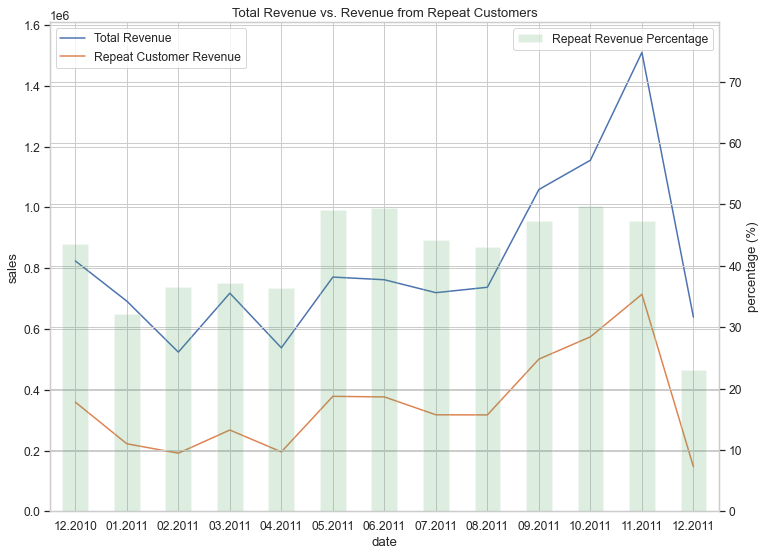

In [142]:
#plotting the Repeated cutomers revenue by month and overall revenue by month
ax = pd.DataFrame(df_monthly_Rev.values).plot(figsize=(12,9))

pd.DataFrame(repeat_customers_rev.values).plot(
    ax=ax,
    grid=True,
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')

ax.legend(['Total Revenue', 'Repeat Customer Revenue'])

ax.set_ylim([0, max(df_monthly_Rev.values)+100000])

ax2 = ax.twinx()

pd.DataFrame(monthly_rev_perc_repeat_customers_df.values).plot(
    ax=ax2,
    kind='bar',
    color='g',
    alpha=0.2
)

ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])

ax2.set_xticklabels([
    x.strftime('%m.%Y') for x in monthly_rev_perc_repeat_customers_df.index
])

plt.show()

> Roughly 40-50% of the Total Revenue is from repeat customers (20 - 30 % of all customers).

In [155]:
 #Popular items(purchased frequently) by month
date_item_df = pd.DataFrame(
    df.set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
)
date_item_df

Quantity
InvoiceDate StockCode             
2010-12-31  10002              251
            10120               16
            10123C               1
            10124A               4
            10124G               5
...                            ...
2011-12-31  DCGSSBOY             1
            DOT                 17
            M                  819
            POST               124
            gift_0001_10         1

[34177 rows x 1 columns]

In [163]:
#november top 5 Items 
Nov_purchases = date_item_df.loc['2011-11-30'].sort_values(
    by = 'Quantity', ascending = False).reset_index()
Nov_purchases[:5]

,InvoiceDate,StockCode,Quantity
0,2011-11-30,23084,14954
1,2011-11-30,84826,12551
2,2011-11-30,22197,12460
3,2011-11-30,22086,7908
4,2011-11-30,85099B,5909


In [176]:
# Regroup for top 5 items

date_item_df = pd.DataFrame(
    df.loc[
        df['StockCode'].isin(['23084', '84826', '22197', '22086', '85099B'])
    ].set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
)
date_item_df

Quantity
InvoiceDate StockCode          
2010-12-31  22086          2460
            22197          2738
            84826           366
            85099B         2152
2011-01-31  22086            24
            22197          1824
            84826           480
            85099B         2747
2011-02-28  22086             5
            22197          2666
            84826            66
            85099B         3080
2011-03-31  22086            87
            22197          2803
            84826            60
            85099B         5282
2011-04-30  22086            13
            22197          1869
            84826             1
            85099B         2456
2011-05-31  22086            17
            22197          6849
            23084          1131
            85099B         3621
2011-06-30  22086           344
            22197          2095
            23084          1713
            84826             4
            85099B         3682
2011-07-31  22086           383
            22197          1876
            23084           318
            84826             2
            85099B         3129
2011-08-31  22086           490
            22197          5421
            23084          2267
            84826            72
            85099B         5502
2011-09-30  22086          2106
            22197          4196
            23084           680
            85099B         4401
2011-10-31  22086          3429
            22197          5907
            23084          6348
            84826            11
            85099B         5412
2011-11-30  22086          7908
            22197         12460
            23084         14954
            84826         12551
            85099B         5909
2011-12-31  22086          2089
            22197          6217
            23084          4311
            84826            92
            85099B         1105

In [177]:
#creating a pivot table with the top 5 popular item sold each month
trending_itmes_df = date_item_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)

trending_itmes_df = trending_itmes_df.reset_index()
trending_itmes_df = trending_itmes_df.set_index('InvoiceDate')
trending_itmes_df.columns = trending_itmes_df.columns.droplevel(0)

trending_itmes_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,2460.0,2738.0,0.0,366.0,2152.0
2011-01-31,24.0,1824.0,0.0,480.0,2747.0
2011-02-28,5.0,2666.0,0.0,66.0,3080.0
2011-03-31,87.0,2803.0,0.0,60.0,5282.0
2011-04-30,13.0,1869.0,0.0,1.0,2456.0
2011-05-31,17.0,6849.0,1131.0,0.0,3621.0
2011-06-30,344.0,2095.0,1713.0,4.0,3682.0
2011-07-31,383.0,1876.0,318.0,2.0,3129.0
2011-08-31,490.0,5421.0,2267.0,72.0,5502.0


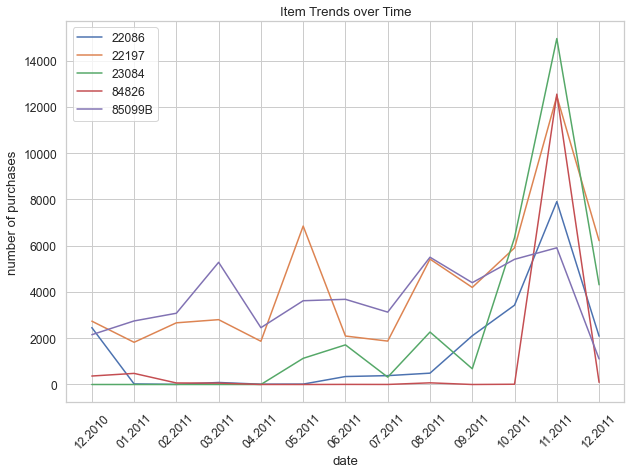

In [178]:
#visualizing these top 5 items
ax = pd.DataFrame(trending_itmes_df.values).plot(
    figsize=(10,7),
    grid=True,
)

ax.set_ylabel('number of purchases')
ax.set_xlabel('date')
ax.set_title('Item Trends over Time')

ax.legend(trending_itmes_df.columns, loc='upper left')

plt.xticks(
    range(len(trending_itmes_df.index)), 
    [x.strftime('%m.%Y') for x in trending_itmes_df.index], 
    rotation=45
)

plt.show()

>The sales of these five products spiked in November 2011, especially, the sales of the product with the stock code, 85099B, which were close to 0 from February 2011 to October 2011. Then, it suddenly spiked in November2011.

## Preparing Dataset for RFM analysis:

> Steps of RFM(Recency, Frequency, Monetary):

- Calculate the Recency, Frequency, Monetary values for each customer.
- Add segment bin values to RFM table using quartile.
- Sort the customer RFM score in ascending order.

In [16]:
#Filtering the Dataset customer ID Column of null values
data = df[pd.notnull(df['CustomerID'])]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   Total_sum    397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [18]:
data[data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_sum
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,1.25
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,2.10
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom,2.95
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom,4.95
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom,2.95
...,...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom,0.39
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom,2.49
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom,1.95
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom,2.10


> The Single invoice contains several elements purchased by the customer

In [19]:
#No Null values or -ve Values
data.describe()

,Quantity,UnitPrice,CustomerID,Total_sum
count,397924.000000,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171,22.394749
std,180.420210,22.096788,1713.169877,309.055588
min,1.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,13969.000000,4.680000
50%,6.000000,1.950000,15159.000000,11.800000
75%,12.000000,3.750000,16795.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


In [20]:
data['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [23]:
present_date = dt.datetime(2011,12,10)

In [27]:
rfm= data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (present_date - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'Total_sum': lambda price: price.sum()})

In [29]:
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [26]:
rfm.columns=['monetary','frequency','recency']
rfm

,monetary,frequency,recency
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


> Customers with the **lowest recency, highest frequency and monetary amounts** considered as top customers.

 ### Simple Quantiles [25% , 50% , 75%]

In [30]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,17.0,17.0,307.245
0.50,50.0,41.0,674.450
0.75,141.5,100.0,1661.640


In [31]:
rfm.describe()

,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000
mean,92.041484,91.708689,2053.793018
std,100.007757,228.792852,8988.248381
min,0.000000,1.000000,0.000000
25%,17.000000,17.000000,307.245000
50%,50.000000,41.000000,674.450000
75%,141.500000,100.000000,1661.640000
max,373.000000,7847.000000,280206.020000


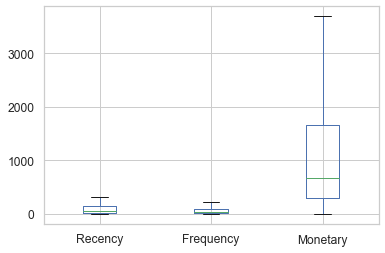

In [32]:
rfm.plot(kind = 'box', showfliers = False);

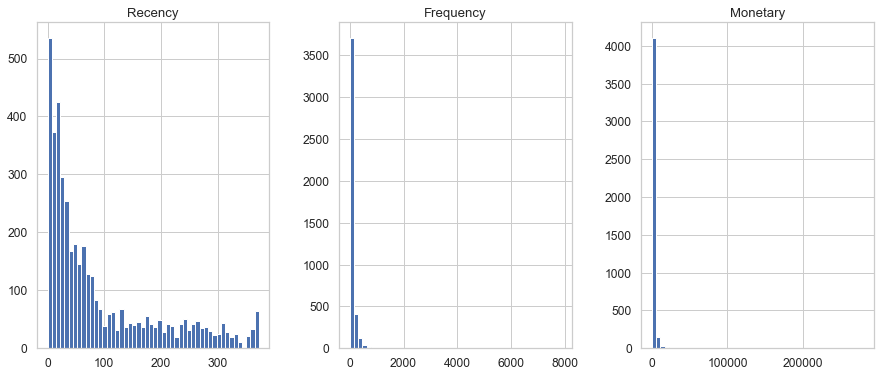

In [38]:
rfm.hist(bins=50, layout=(1,3), figsize=(15,6));

In [44]:
np.log10(rfm['Frequency'].describe())

count    3.637390
mean     1.962410
std      2.359442
min      0.000000
25%      1.230449
50%      1.612784
75%      2.000000
max      3.894704
Name: Frequency, dtype: float64

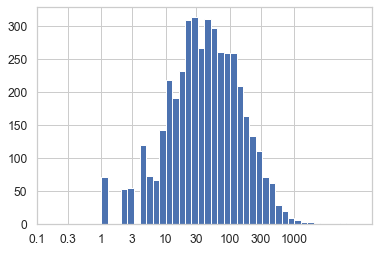

In [46]:
#Transforming the frequency variable to get a better look at it's distribution
bins = 10 ** np.arange(0, 4+0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]

plt.hist(data=rfm, x='Frequency', bins=bins);
plt.xscale('log')
plt.xticks(ticks, labels);

In [48]:
(rfm['Monetary'].describe())

count      4339.000000
mean       2053.793018
std        8988.248381
min           0.000000
25%         307.245000
50%         674.450000
75%        1661.640000
max      280206.020000
Name: Monetary, dtype: float64

> Most of the Orders are < 100 days, Most frequency from 20 to 100, Monetary most values are < 1000

### Computing Quantile of RFM values:

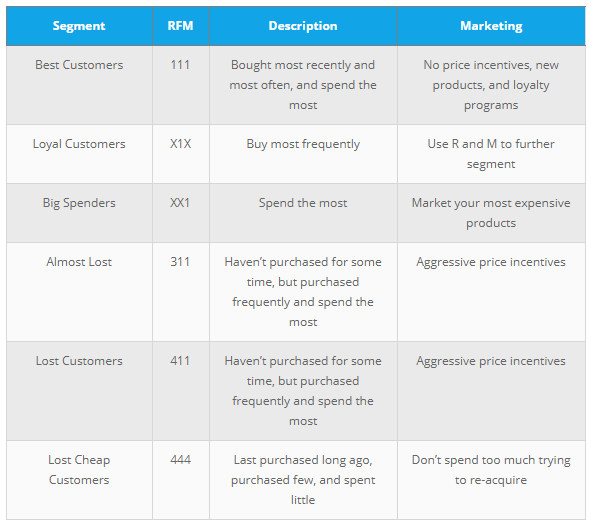

In [50]:
#assigning Quantile values for each customer , less recency value is better ,
#while higher frequency and monetary value the better
rfm['r_quartile'] = pd.qcut(rfm['Recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['Frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['Monetary'], 4, ['4','3','2','1'])

In [52]:
#Creating a Score column that combines all the scores 
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12347.0,2,182,4310.00,1,1,1,111
12348.0,75,31,1797.24,3,3,1,331
12349.0,18,73,1757.55,2,2,1,221
12350.0,310,17,334.40,4,4,3,443


In [54]:
# Filter out Top/Best customers
rfm[rfm['RFM_Score']=='111'].sort_values('Monetary', ascending=False).head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
14646.0,1,2080,280206.02,1,1,1,111
18102.0,0,431,259657.30,1,1,1,111
17450.0,8,337,194550.79,1,1,1,111
14911.0,1,5677,143825.06,1,1,1,111
14156.0,9,1400,117379.63,1,1,1,111


In [69]:
rfm.groupby('RFM_Score').agg({'Recency':'mean',
             'Frequency': 'mean',
             'Monetary': 'mean'})

,Recency,Frequency,Monetary
RFM_Score,,,
111,6.629545,377.743182,9427.541159
112,7.758621,187.712644,1173.286782
113,9.500000,133.125000,542.578125
114,8.000000,115.666667,292.543333
121,7.790698,77.953488,4407.852791
...,...,...,...
434,251.650000,26.120000,200.651500
441,250.300000,6.700000,17815.672000
442,239.875000,8.791667,961.328333


### Alternative Approach

> To segment the customers using “Recency” and “Frequency” values, we have set up regular expression (regex) structure by using dictionaries to name customer segments according to their Recency and Frequency Scores:

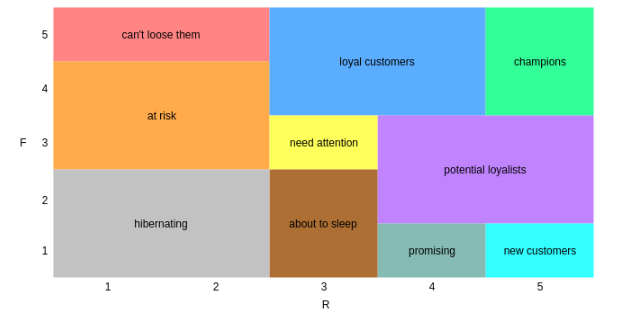

In [76]:
rfm['r_quartile'] = pd.qcut(rfm['Recency'], 5, ['5','4','3','2','1'])
rfm['f_quartile'] = pd.qcut(rfm['Frequency'], 5, ['1','2','3','4','5'])
rfm['m_quartile'] = pd.qcut(rfm['Monetary'], 5, ['1','2','3','4','5'])

In [78]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,5,115
12347.0,2,182,4310.00,5,5,5,555
12348.0,75,31,1797.24,2,3,4,234
12349.0,18,73,1757.55,4,4,4,444
12350.0,310,17,334.40,1,2,2,122


In [79]:
rfm["RF_SCORE"] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str)
rfm.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score,RF_SCORE
CustomerID,,,,,,,,
12346.0,325,1,77183.60,1,1,5,115,11
12347.0,2,182,4310.00,5,5,5,555,55
12348.0,75,31,1797.24,2,3,4,234,23
12349.0,18,73,1757.55,4,4,4,444,44
12350.0,310,17,334.40,1,2,2,122,12


In [84]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Lose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [85]:
rfm["RF_SCORE"]= rfm['RF_SCORE'].replace(seg_map, regex=True)
rfm.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score,RF_SCORE
CustomerID,,,,,,,,
12346.0,325,1,77183.60,1,1,5,115,Hibernating
12347.0,2,182,4310.00,5,5,5,555,Champions
12348.0,75,31,1797.24,2,3,4,234,At Risk
12349.0,18,73,1757.55,4,4,4,444,Loyal Customers
12350.0,310,17,334.40,1,2,2,122,Hibernating


In [87]:
rfm[rfm['RF_SCORE'] == 'Champions']

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score,RF_SCORE
CustomerID,,,,,,,,
12347.0,2,182,4310.00,5,5,5,555,Champions
12362.0,3,266,5226.23,5,5,5,555,Champions
12364.0,7,85,1313.10,5,4,4,544,Champions
12381.0,4,87,1845.31,5,4,4,544,Champions
12417.0,3,192,3649.10,5,5,5,555,Champions
...,...,...,...,...,...,...,...,...
18237.0,2,61,987.10,5,4,4,544,Champions
18241.0,9,104,2073.09,5,4,5,545,Champions
18245.0,7,175,2567.06,5,5,5,555,Champions


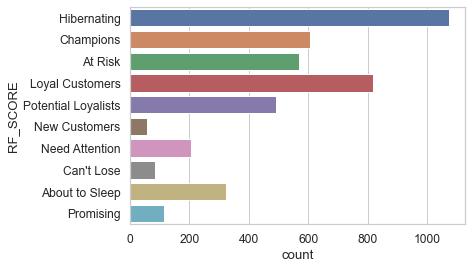

<Figure size 720x576 with 0 Axes>

In [92]:
sb.countplot(data=rfm, y='RF_SCORE')
plt.figure(figsize=(10, 8));

### Ranking RFM as High, medium and low valued customers 

Derive weighted score across each parameter for each customer:

Consolidated Score = 0.15*R + 0.28*F + 0.57*M

In [59]:
rfm_df = rfm.copy()
rfm_df['R_rank'] = rfm_df['Recency'].rank( ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
rfm_df.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score,R_rank,F_rank,M_rank
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,162.5,36.5,4330.0
12347.0,2,182,4310.00,1,1,1,111,4156.5,3823.0,4004.0
12348.0,75,31,1797.24,3,3,1,331,1646.0,1827.5,3334.0
12349.0,18,73,1757.55,2,2,1,221,3209.5,2888.5,3306.0
12350.0,310,17,334.40,4,4,3,443,227.5,1081.5,1230.0


In [60]:
# normalize each rank with Max rank
rfm_df['R_rank_norm']=(rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm']=(rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm']=(rfm_df['F_rank']/rfm_df['M_rank'].max())*100
rfm_df.head()
# Now apply our equation and create final score **Consolidated Score = 0.15*R_rank_norm + 0.28*F_rank_norm + 0.57M_rank_norm**
rfm_df['RFM_Score']=0.15*rfm_df['R_rank_norm']+0.28*rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df=rfm_df.round(0)
rfm_df.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm
CustomerID,,,,,,,,,,,,,
12346.0,325,1,77184.0,4,4,1,1.0,162.0,36.0,4330.0,4.0,1.0,1.0
12347.0,2,182,4310.0,1,1,1,89.0,4156.0,3823.0,4004.0,96.0,88.0,88.0
12348.0,75,31,1797.0,3,3,1,42.0,1646.0,1828.0,3334.0,38.0,42.0,42.0
12349.0,18,73,1758.0,2,2,1,68.0,3210.0,2888.0,3306.0,74.0,67.0,67.0
12350.0,310,17,334.0,4,4,3,22.0,228.0,1082.0,1230.0,5.0,25.0,25.0


In [61]:
# ## Customer segments with RFM Model
# # Segment customers based on RFM score
# 0 - 50 - Low valued customer
# 50 - 75 - Medium valued customer
# 76 - 100 - High valued customer
rfm_df["Customer_segment"]=np.where(rfm_df['RFM_Score'] > 75 ,"High Value Customer",
                                    (np.where(rfm_df['RFM_Score'] < 50 , "Low value Customer" ,"Medium Value Customer")))
rfm_df.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,Customer_segment
CustomerID,,,,,,,,,,,,,,
12346.0,325,1,77184.0,4,4,1,1.0,162.0,36.0,4330.0,4.0,1.0,1.0,Low value Customer
12347.0,2,182,4310.0,1,1,1,89.0,4156.0,3823.0,4004.0,96.0,88.0,88.0,High Value Customer
12348.0,75,31,1797.0,3,3,1,42.0,1646.0,1828.0,3334.0,38.0,42.0,42.0,Low value Customer
12349.0,18,73,1758.0,2,2,1,68.0,3210.0,2888.0,3306.0,74.0,67.0,67.0,Medium Value Customer
12350.0,310,17,334.0,4,4,3,22.0,228.0,1082.0,1230.0,5.0,25.0,25.0,Low value Customer


In [64]:
len(rfm_df[rfm_df["Customer_segment"] == 'High Value Customer'])/len(rfm_df)*100

22.332334639317818

In [67]:
rfm_df["Customer_segment"].value_counts(normalize=True)

Low value Customer       0.498732
Medium Value Customer    0.277944
High Value Customer      0.223323
Name: Customer_segment, dtype: float64

> About 22% of the customers are high valued, those who derive the company's revenue, also 28% are of medium value and 50% are of low value

## Clustering 
Preprocessing of Data

In [177]:
data = data[data['Total_sum'] > 0]

In [178]:
#1st step grouping the customers by their ID and invoice number to determine the sum of purchases for each customer
customer_df = data.groupby('CustomerID').agg({'Total_sum': sum, 'InvoiceNo': lambda x:x.nunique()
                                           })
customer_df.columns = ['Total_sales', 'Order_count']
customer_df['Avg_order_value'] = customer_df['Total_sales']/customer_df['Order_count']
customer_df

,Total_sales,Order_count,Avg_order_value
CustomerID,,,
12346.0,77183.60,1,77183.600000
12347.0,4310.00,7,615.714286
12348.0,1797.24,4,449.310000
12349.0,1757.55,1,1757.550000
12350.0,334.40,1,334.400000
...,...,...,...
18280.0,180.60,1,180.600000
18281.0,80.82,1,80.820000
18282.0,178.05,2,89.025000


In [185]:
#rank the data,so that the values of each column range from 1 to 4338
rank_df = customer_df.rank(method='first')
rank_df

,Total_sales,Order_count,Avg_order_value
CustomerID,,,
12346.0,4329.0,1.0,4337.0
12347.0,4003.0,3639.0,3822.0
12348.0,3333.0,2837.0,3345.0
12349.0,3305.0,2.0,4275.0
12350.0,1229.0,3.0,2590.0
...,...,...,...
18280.0,563.0,1492.0,1106.0
18281.0,104.0,1493.0,169.0
18282.0,546.0,2328.0,201.0


In [186]:
#normalizing the data to have a mean of 0 and std of 1
normalized_df = (rank_df-rank_df.mean())/rank_df.std()
normalized_df.describe()

,Total_sales,Order_count,Avg_order_value
count,4.338000e+03,4.338000e+03,4.338000e+03
mean,-8.847490e-17,4.366161e-17,-3.547186e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.731452e+00,-1.731452e+00,-1.731452e+00
25%,-8.657260e-01,-8.657260e-01,-8.657260e-01
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.657260e-01,8.657260e-01,8.657260e-01
max,1.731452e+00,1.731452e+00,1.731452e+00


In [159]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [187]:
for n_cluster in [4, 5, 6, 7, 8]:
    kmeans_model = KMeans(n_clusters=n_cluster).fit(normalized_df[['Total_sales', 'Order_count', 'Avg_order_value']])
    silhouette_avg = silhouette_score(normalized_df[['Total_sales', 'Order_count', 'Avg_order_value']], 
                                      kmeans_model.labels_)
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster,silhouette_avg))

Silhouette Score for 4 Clusters: 0.4118
Silhouette Score for 5 Clusters: 0.3785
Silhouette Score for 6 Clusters: 0.3779
Silhouette Score for 7 Clusters: 0.3914
Silhouette Score for 8 Clusters: 0.3796


In [188]:
#Implementing 4 clusters (with the highest Silhoutte Score)
k_means= KMeans(n_clusters=4).fit(normalized_df[['Total_sales', 'Order_count', 'Avg_order_value']])

In [189]:
model_df = normalized_df[['Total_sales', 'Order_count', 'Avg_order_value']].copy(deep=True)
model_df['Cluster'] =k_means.labels_+1
rank_df_model  = pd.concat([customer_df, model_df['Cluster']], axis=1)
rank_df_model

,Total_sales,Order_count,Avg_order_value,Cluster
CustomerID,,,,
12346.0,77183.60,1,77183.600000,3
12347.0,4310.00,7,615.714286,1
12348.0,1797.24,4,449.310000,1
12349.0,1757.55,1,1757.550000,3
12350.0,334.40,1,334.400000,3
...,...,...,...,...
18280.0,180.60,1,180.600000,2
18281.0,80.82,1,80.820000,2
18282.0,178.05,2,89.025000,2


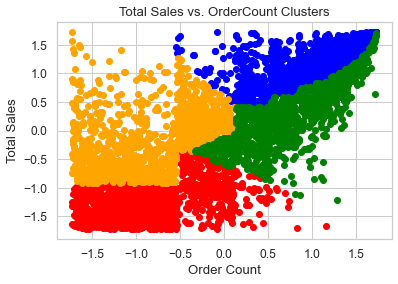

In [190]:
plt.scatter(model_df.loc[model_df['Cluster'] == 1]['Order_count'],
           model_df.loc[model_df['Cluster'] == 1]['Total_sales'], c = 'blue')

plt.scatter(model_df.loc[model_df['Cluster'] == 2]['Order_count'],
           model_df.loc[model_df['Cluster'] == 2]['Total_sales'], c = 'red')

plt.scatter(model_df.loc[model_df['Cluster'] == 3]['Order_count'],
           model_df.loc[model_df['Cluster'] == 3]['Total_sales'], c = 'orange')

plt.scatter(model_df.loc[model_df['Cluster'] == 4]['Order_count'],
           model_df.loc[model_df['Cluster'] == 4]['Total_sales'], c = 'green')

plt.title ('Total Sales vs. OrderCount Clusters')
plt.xlabel ('Order Count')
plt.ylabel ('Total Sales')
plt.show()

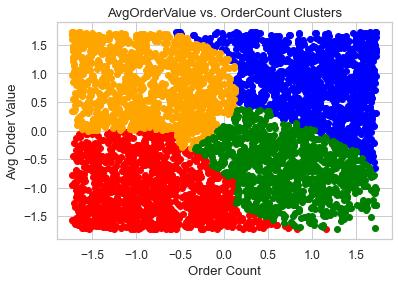

In [191]:
plt.scatter(
    model_df.loc[model_df['Cluster'] == 1]['Order_count'], 
    model_df.loc[model_df['Cluster'] == 1]['Avg_order_value'],
    c='blue'
)

plt.scatter(
    model_df.loc[model_df['Cluster'] == 2]['Order_count'], 
    model_df.loc[model_df['Cluster'] == 2]['Avg_order_value'],
    c='red'
)

plt.scatter(
    model_df.loc[model_df['Cluster'] == 3]['Order_count'], 
    model_df.loc[model_df['Cluster'] == 3]['Avg_order_value'],
    c='orange'
)

plt.scatter(
    model_df.loc[model_df['Cluster'] == 4]['Order_count'], 
    model_df.loc[model_df['Cluster'] == 4]['Avg_order_value'],
    c='green'
)

plt.title('AvgOrderValue vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Avg Order Value')

plt.show()

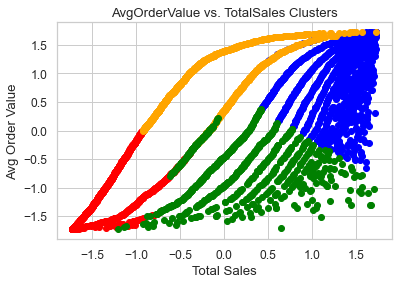

In [195]:
plt.scatter(
    model_df.loc[model_df['Cluster'] == 1]['Total_sales'], 
    model_df.loc[model_df['Cluster'] == 1]['Avg_order_value'],
    c='blue'
)

plt.scatter(
    model_df.loc[model_df['Cluster'] == 2]['Total_sales'], 
    model_df.loc[model_df['Cluster'] == 2]['Avg_order_value'],
    c='red'
)

plt.scatter(
    model_df.loc[model_df['Cluster'] == 3]['Total_sales'], 
    model_df.loc[model_df['Cluster'] == 3]['Avg_order_value'],
    c='orange'
)

plt.scatter(
    model_df.loc[model_df['Cluster'] == 4]['Total_sales'], 
    model_df.loc[model_df['Cluster'] == 4]['Avg_order_value'],
    c='green'
)

plt.title('AvgOrderValue vs. TotalSales Clusters')
plt.xlabel('Total Sales')
plt.ylabel('Avg Order Value')


plt.show()

> The cluster in blue is the group of high-value customers, who have purchased the greatest amount and who have purchased products frequently

> The cluster in red is the group of low-value customers, who have not purchased products as much.

In [194]:
rank_df_model.groupby('Cluster')['Avg_order_value'].mean()

Cluster
1    681.864621
2    152.492204
3    614.896663
4    205.961635
Name: Avg_order_value, dtype: float64

In [197]:
high_value_cluster = model_df.loc[model_df['Cluster'] == 1]
customer_df.loc[high_value_cluster.index].describe()


,Total_sales,Order_count,Avg_order_value
count,1164.000000,1164.000000,1164.000000
mean,5894.359709,8.827320,681.864621
std,16553.025639,10.890619,2567.733366
min,1030.140000,1.000000,200.967436
25%,1823.915000,4.000000,351.454167
50%,2768.720000,6.000000,438.556667
75%,4634.767500,10.000000,614.223333
max,280206.020000,201.000000,84236.250000


In [198]:
#the best-selling items for the high paying cluster
pd.DataFrame(
    df.loc[
        df['CustomerID'].isin(high_value_cluster.index)
    ].groupby('Description').count()[
        'StockCode'
    ].sort_values(ascending=False).head()
)

,StockCode
Description,
JUMBO BAG RED RETROSPOT,1193
WHITE HANGING HEART T-LIGHT HOLDER,1129
REGENCY CAKESTAND 3 TIER,1111
LUNCH BAG RED RETROSPOT,978
PARTY BUNTING,886


<a id='conclusions'></a>
## Conclusions



> Customer segmentation is one of the most important tasks in any business, gaining insights into your customers' purchasing behavior and/or understanding reasons for churn, customer retention, seamless customer experience and bottlenecks to customers' base growth is crucial for all areas concerning that business.
> Need of Customer Segmentation
- Identifying the most profitable and least profitable customers.
- Communicate easily with targetted group of the audience.
- Selecting the best medium for communicating with the targetted segment (opportunities for upselling and cross-selling).
- Improves the quality of service, loyalty, and retention.
- Improve customer relationship through understanding needs of segments.
- Design special offers for targetted customers, encourage them to buy more products.
- Knowing Your Customers will always put you a step ahead of competitors.
- Identifying new products that customers could be interested in.

> For business purposes RFM Analysis, “recency, frequency, monetary,” represents some of the most important attributes of a customer from a company’s point of view, to conduct the clustering analysis, collecting the relevant data on each customer and sort customers into groups based on similar values for each of the RFM variables.

> In that Notebook I've represented a public dataset analysis for Customer Segmentation Using K-means and RFM approachs, results of the analysis are:
 - The Best clusters using K-means unsupervised machine learning model and Silhouette metric were found to be 4
 - Cluster No 1 has avg Total spending of about 6000, and avg frequency of purchase 8 times
 

> Code references and inspirations :
 
 - [Tern Poh Lim's](https://towardsdatascience.com/the-most-important-data-science-tool-for-market-and-customer-segmentation-c9709ca0b64a) Article in Towards Data Science
 
 - Data Camp's [Introduction to Customer Segmentation in Python](https://www.datacamp.com/community/tutorials/introduction-customer-segmentation-python)
 
 - Hands on Data Science for Marketing Book, By Yoon Hyup Hwang
 - Analytics vidhya [Customer Lifetime Value using RFM Analysis](https://www.analyticsvidhya.com/blog/2021/04/customer-lifetime-value-using-rfm-analysis/)
 -RFM Analysis https://runawayhorse001.github.io/LearningApacheSpark/rfm.html
 -RFM Analysis for Customer Segmentation https://medium.com/@yamanbsr/rfm-analysis-for-customer-segmentation-29c8c7e04f5c
 